In [104]:

# Теоретические сведения:
#
# Матрица Гессе H функции f: R^n -> R - это матрица, составленная из всех вторых частных производных 
#   некоторой функции n переменных f(x1, ..., x_n), 
#   Имеет размерность n x n
#
#   h_ij = d^2(f) / (dx_i * dx_j)
#
#   Более подробно: https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D1%81%D1%81%D0%B8%D0%B0%D0%BD_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8
#
#
# Матрица Якоби J векторной функции n переменных g: R^n -> R^m - 

In [105]:
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("..")
from src.SQP_method import SQP_method

In [106]:
# Функция Розенброка - отладочная функция
def f(x, y):
    
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

In [107]:
# Ограничение - круговая область (также отладочное)
def g(x, y):
    
    return np.array([[x ** 2 + y ** 2 - 2]])

In [108]:
# Градиент минимизируемой функции
def df(x, y):
    
    return np.array([[2 * (x - 1) + 400 * x * (x ** 2 - y)], [200 * (y - x ** 2)]])

In [109]:
# матрица Гессе минимизируемой функции
def Hf(x, y):
    
    H11 = 2 + 400 * (x ** 2 - y) * (2 * x + 1)
    H12 = -400 * x
    H21 = -400 * x
    H22 = 200
    
    return np.array([[H11, H12], [H21, H22]])

In [110]:
# Матрица Якоби ограничивающей функции
def Jg(x, y):
    
    J11 = 2 * x
    J12 = 2 * y
    
    return np.array([[J11, J12]])

In [111]:
# Матрица Гессе ограничивающей функции
def Hg(x, y):
    
    H11 = 2
    H12 = 0
    H21 = 0
    H22 = 2
    
    return np.expand_dims(np.array([[H11, H12], [H21, H22]]), axis=1)

In [112]:
# Градиент функции Лагранжа
def dL(x, y, Lambda):
    
    L1 = df(x, y) + Jg(x, y).T @ Lambda
    L2 = g(x, y)
    
    return np.vstack([L1, L2])

In [121]:
x_min, y_min, log = SQP_method(x_0=2, y_0=0, Lambda_0=100 * np.ones((1, 1)),
                  f=f, Hf=Hf, Hg=Hg, Jg=Jg, dL=dL,
                  goal=1e-5, show=False)


_________________________________________________________________________________


// Найден локальный минимум за число шагов, равное 66 //

В точке:		(1.000, 1.000)
Значение функции:		 0.000



In [122]:
x_log = [coord[0] for coord in log]
y_log = [coord[1] for coord in log]
f_log = [f(coord[0], coord[1]) for coord in log]

In [134]:
x = np.linspace(-2, 2, 10000)
y = np.linspace(-2, 2, 10000)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

In [135]:
from math import sqrt

In [138]:
x_g = np.linspace(-sqrt(2), sqrt(2), 10000)
y_g_1 = np.sqrt(2 - x_g ** 2)
y_g_2 = -np.sqrt(2 - x_g ** 2)

z_g_1 = np.array([f(x, y) for x, y in zip(list(x_g), list(y_g_1))])
z_g_2 = np.array([f(x, y) for x, y in zip(list(x_g), list(y_g_2))])

/tmp/ipykernel_25855/1664214325.py:2: RuntimeWarning: invalid value encountered in sqrt
  y_g_1 = np.sqrt(2 - x_g ** 2)
/tmp/ipykernel_25855/1664214325.py:3: RuntimeWarning: invalid value encountered in sqrt
  y_g_2 = -np.sqrt(2 - x_g ** 2)


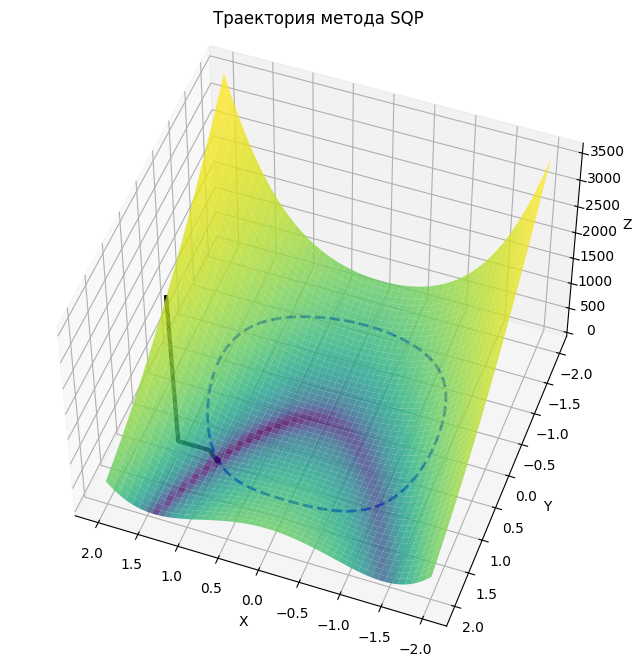

In [139]:

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": "3d"})

ax.plot_surface(X, Y, Z, cmap='viridis', norm="log", alpha=0.8)
ax.plot(x_log, y_log, f_log, color="black", lw=3, alpha=1)

ax.plot(x_g, y_g_1, z_g_1, color="blue", ls="--", lw=2, alpha=1)
ax.plot(x_g, y_g_2, z_g_2, color="blue", ls="--", lw=2, alpha=1)
ax.view_init(elev=50, azim=110)
    
plt.title('Траектория метода SQP')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()